In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline 

# Regression Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Advanced Soybean new.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "willianoliveiragibin/soybean-agricultural",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\1508918065.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:   Parameters Random  Number of Pods (NP)  Biological Weight (BW)  Sugars (Su)  \
0     C1S1G5     R1                130.3                   111.0       433.00   
1     C2S3G4     R1                132.0                    80.0       334.00   
2     C2S1G6     R1                150.0                    83.0         0.49   
3     C1S1G1     R1                140.8                    66.0       163.00   
4     C1S2G6     R2                175.6                    73.0       795.00   

   Relative Water Content in Leaves (RWCL)  ChlorophyllA663  Chlorophyllb649  \
0                                    732.0              1.4              3.1   
1                                    674.0              7.1              2.2   
2                                    677.0              1.8              1.3   
3                                    745.0              1.1              3.0   
4                                    725.0              7.5              2.1   

   Protein Perc

# Data Perparation

In [3]:
df.head()

,Parameters,Random,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH)
0,C1S1G5,R1,130.3,111.0,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,"133943600,00%","R$ 50,50"
1,C2S3G4,R1,132.0,80.0,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,"12613100,00%","R$ 44,50"
2,C2S1G6,R1,150.0,83.0,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,"88626100,00%","R$ 52,20"
3,C1S1G1,R1,140.8,66.0,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,"157577800,00%","R$ 50,50"
4,C1S2G6,R2,175.6,73.0,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.6,"72960400,00%","R$ 49,20"


*Parameters Explanation*

G: The type (or "genotype") of the soybean plant (there are 6 types). 

C: If the plant was given salicylic acid (a natural plant booster). There were three levels: 250 mg 450 mg No salicylic acid (control group). 

S: How much water stress the plant experienced. There were two levels: Very little water (5% of field capacity) A lot more water (70% of field capacity) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Number of Pods (NP)                      55450 non-null  float64
 3   Biological Weight (BW)                   55450 non-null  float64
 4   Sugars (Su)                              55450 non-null  float64
 5   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 6   ChlorophyllA663                          55450 non-null  float64
 7   Chlorophyllb649                          55450 non-null  float64
 8   Protein Percentage (PPE)                 55450 non-null  float64
 9   Weight of 300 Seeds (W3S)                55450 non-null  float64
 10  Leaf Area Index (LAI)                    55450

In [5]:
df.isna().sum()

Parameters                                 0
Random                                     0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
Seed Yield per Unit Area (SYUA)            0
Plant Height (PH)                          0
dtype: int64

In [6]:
# Cleaning Numeric Columns
df['Seed Yield per Unit Area (SYUA)'] = df['Seed Yield per Unit Area (SYUA)'].str.replace('%', '', regex=False)
df['Seed Yield per Unit Area (SYUA)'] = df['Seed Yield per Unit Area (SYUA)'].str.replace(',', '.', regex=False)
df['Seed Yield per Unit Area (SYUA)'] = pd.to_numeric(df['Seed Yield per Unit Area (SYUA)'], errors='coerce') / 100

df['Plant Height (PH)'] = df['Plant Height (PH)'].str.replace('R$', '', regex=False).str.strip()
df['Plant Height (PH)'] = df['Plant Height (PH)'].str.replace(',', '.', regex=False)
df['Plant Height (PH)'] = pd.to_numeric(df['Plant Height (PH)'], errors='coerce')


In [7]:
df.loc[68,"Protein Content (PCO)"].replace(".","")

'R$ 45839,00'

In [8]:
df["Protein Content (PCO)"] = df["Protein Content (PCO)"].str.replace('R$', '', regex=False).str.strip()
while True:
    try:
        df['Protein Content (PCO)'] = pd.to_numeric(df['Protein Content (PCO)'])
        break
    except ValueError as e:
        match = re.search(r"at position (\d+)", str(e))
        if match:
            position = int(match.group(1))
            initial_term = df.loc[position,"Protein Content (PCO)"]
            df.loc[position,"Protein Content (PCO)"] = df.loc[position,"Protein Content (PCO)"].replace(".","")
            df.loc[position,"Protein Content (PCO)"] = df.loc[position,"Protein Content (PCO)"].replace(",",".")
            print(f"Position {position} is being adjusted from {initial_term} to {df.loc[position,'Protein Content (PCO)']}")
        else:
            raise
    


Position 68 is being adjusted from 45.839,00 to 45839.00
Position 71 is being adjusted from 45.839,00 to 45839.00
Position 100 is being adjusted from 45.839,00 to 45839.00
Position 116 is being adjusted from 45.870,00 to 45870.00
Position 148 is being adjusted from 45.839,00 to 45839.00
Position 196 is being adjusted from 45.839,00 to 45839.00
Position 274 is being adjusted from 45.870,00 to 45870.00
Position 289 is being adjusted from 45.992,00 to 45992.00
Position 328 is being adjusted from 45.870,00 to 45870.00
Position 354 is being adjusted from 45.839,00 to 45839.00
Position 372 is being adjusted from 45.839,00 to 45839.00
Position 384 is being adjusted from 45.839,00 to 45839.00
Position 402 is being adjusted from 45.992,00 to 45992.00
Position 492 is being adjusted from 45.992,00 to 45992.00
Position 538 is being adjusted from 45.992,00 to 45992.00
Position 605 is being adjusted from 45.839,00 to 45839.00
Position 615 is being adjusted from 45.839,00 to 45839.00
Position 663 is 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Number of Pods (NP)                      55450 non-null  float64
 3   Biological Weight (BW)                   55450 non-null  float64
 4   Sugars (Su)                              55450 non-null  float64
 5   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 6   ChlorophyllA663                          55450 non-null  float64
 7   Chlorophyllb649                          55450 non-null  float64
 8   Protein Percentage (PPE)                 55450 non-null  float64
 9   Weight of 300 Seeds (W3S)                55450 non-null  float64
 10  Leaf Area Index (LAI)                    55450

In [10]:
df['C_Condition'] = df['Parameters'].str.extract(r'C(\d)')
df['S_Condition'] = df['Parameters'].str.extract(r'S(\d)')
df['G_Condition'] = df['Parameters'].str.extract(r'G(\d)')

df[['C_Condition', 'S_Condition', 'G_Condition']] = df[['C_Condition', 'S_Condition', 'G_Condition']].apply(pd.to_numeric)

In [11]:
df["Random_State"] = df["Random"].str.extract(r"R(\d)")
df["Random_State"] = pd.to_numeric(df['Random_State'], errors='coerce')

In [12]:
df.head()

,Parameters,Random,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH),C_Condition,S_Condition,G_Condition,Random_State
0,C1S1G5,R1,130.3,111.0,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,1339436.0,50.5,1,1,5,1
1,C2S3G4,R1,132.0,80.0,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,126131.0,44.5,2,3,4,1
2,C2S1G6,R1,150.0,83.0,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,886261.0,52.2,2,1,6,1
3,C1S1G1,R1,140.8,66.0,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,1575778.0,50.5,1,1,1,1
4,C1S2G6,R2,175.6,73.0,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.60,729604.0,49.2,1,2,6,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Number of Pods (NP)                      55450 non-null  float64
 3   Biological Weight (BW)                   55450 non-null  float64
 4   Sugars (Su)                              55450 non-null  float64
 5   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 6   ChlorophyllA663                          55450 non-null  float64
 7   Chlorophyllb649                          55450 non-null  float64
 8   Protein Percentage (PPE)                 55450 non-null  float64
 9   Weight of 300 Seeds (W3S)                55450 non-null  float64
 10  Leaf Area Index (LAI)                    55450

In [14]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
for column in object_cols:
    print(f"{column}:\t{df[column].unique()}")

Parameters:	['C1S1G5' 'C2S3G4' 'C2S1G6' 'C1S1G1' 'C1S2G6' 'C2S2G6' 'C1S1G6' 'C1S3G5'
 'C2S2G4' 'C2S3G1' 'C1S1G2' 'C1S3G4' 'C2S3G3' 'C2S1G2' 'C1S3G1' 'C2S2G5'
 'C2S2G1' 'C1S3G2' 'C2S1G1' 'C2S3G2' 'C1S2G1' 'C2S1G3' 'C1S2G4' 'C1S1G4'
 'C2S2G2' 'C1S1G3' 'C1S3G6' 'C2S3G5' 'C1S2G3' 'C2S1G4' 'C2S1G5' 'C2S3G6'
 'C1S2G2' 'C1S3G3' 'C1S2G5']
Random:	['R1' 'R2' 'R3']


In [15]:
numeric_cols = df.select_dtypes(include=["int","float"]).columns.tolist()
numeric_cols

['Number of Pods (NP)',
 'Biological Weight (BW)',
 'Sugars (Su)',
 'Relative Water Content in Leaves (RWCL)',
 'ChlorophyllA663',
 'Chlorophyllb649',
 'Protein Percentage (PPE)',
 'Weight of 300 Seeds (W3S)',
 'Leaf Area Index (LAI)',
 'Number of Seeds per Pod (NSP)',
 'Protein Content (PCO)',
 'Seed Yield per Unit Area (SYUA)',
 'Plant Height (PH)',
 'C_Condition',
 'S_Condition',
 'G_Condition',
 'Random_State']

In [16]:
df.isna().sum()

Parameters                                 0
Random                                     0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
Seed Yield per Unit Area (SYUA)            0
Plant Height (PH)                          0
C_Condition                                0
S_Condition                                0
G_Condition                                0
Random_State                               0
dtype: int64

In [17]:
df_v2 = df.drop(["Parameters","Random"],axis=1)
df_v2.head()

,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH),C_Condition,S_Condition,G_Condition,Random_State
0,130.3,111.0,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,1339436.0,50.5,1,1,5,1
1,132.0,80.0,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,126131.0,44.5,2,3,4,1
2,150.0,83.0,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,886261.0,52.2,2,1,6,1
3,140.8,66.0,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,1575778.0,50.5,1,1,1,1
4,175.6,73.0,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.60,729604.0,49.2,1,2,6,2


# EDA

In [18]:
df_v2.describe()

,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH),C_Condition,S_Condition,G_Condition,Random_State
count,55450.000000,55450.000000,55450.00000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,5.545000e+04,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000
mean,144.938979,114.533886,398.94661,627.210983,3.937670,2.399096,36.042123,35.349129,0.072132,2.020076,1276.073021,8.998303e+05,49.959392,1.500018,1.972191,3.500000,1.999351
std,20.015994,48.925533,257.48728,184.248647,2.846317,1.187323,2.417205,4.999200,0.022278,0.245889,7544.778216,4.684108e+05,3.052315,0.500005,0.832910,1.707805,0.816563
min,75.000000,32.000000,0.18000,0.640000,1.000000,1.100000,31.100000,26.400000,0.020000,1.400000,0.120000,2.470000e+01,40.400000,1.000000,1.000000,1.000000,1.000000
25%,131.400000,80.000000,182.00000,625.000000,1.500000,1.300000,33.600000,32.200000,0.060000,1.850000,0.330000,5.191320e+05,49.200000,1.000000,1.000000,2.000000,1.000000
50%,147.000000,102.000000,423.00000,673.000000,2.300000,2.200000,36.600000,34.500000,0.080000,2.050000,0.480000,8.767650e+05,50.300000,2.000000,2.000000,3.500000,2.000000
75%,158.000000,133.000000,563.00000,722.000000,6.700000,3.100000,38.000000,37.200000,0.090000,2.200000,0.600000,1.217476e+06,52.000000,2.000000,3.000000,5.000000,3.000000
max,218.000000,236.000000,998.00000,875.000000,10.200000,7.800000,39.900000,53.900000,0.100000,2.600000,45992.000000,2.170028e+06,55.700000,2.000000,3.000000,6.000000,3.000000


C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


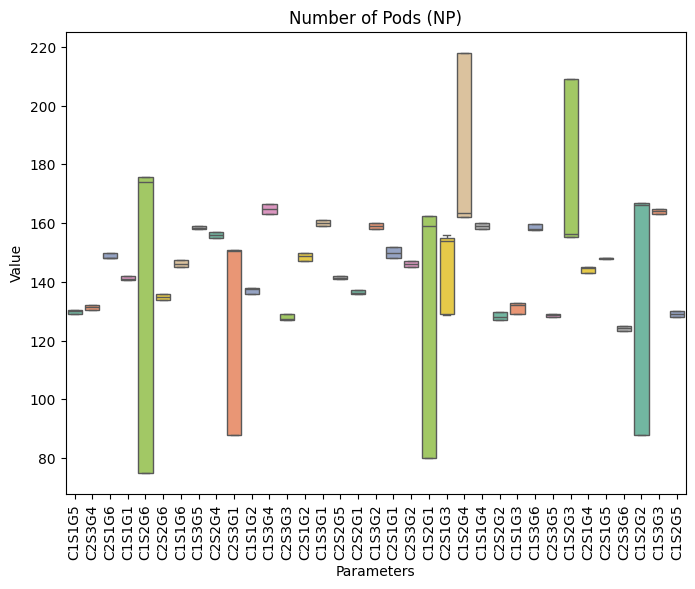

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


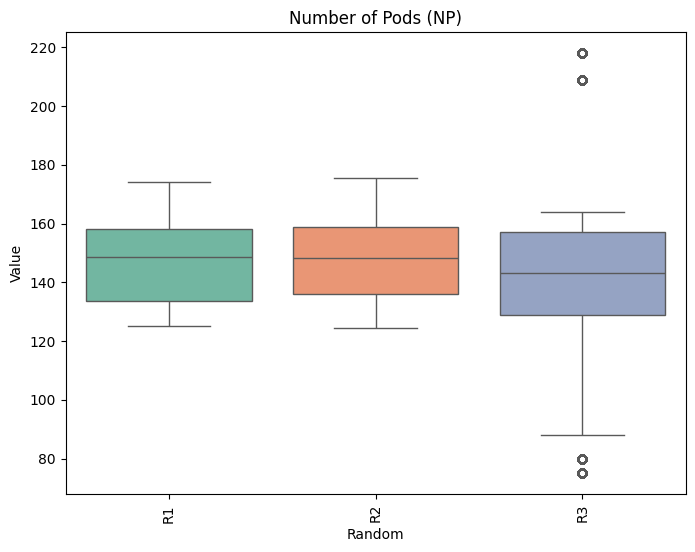

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


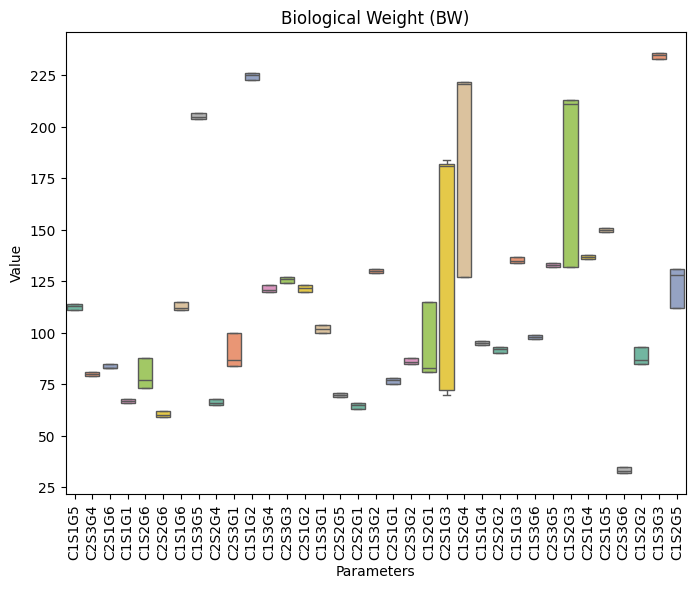

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


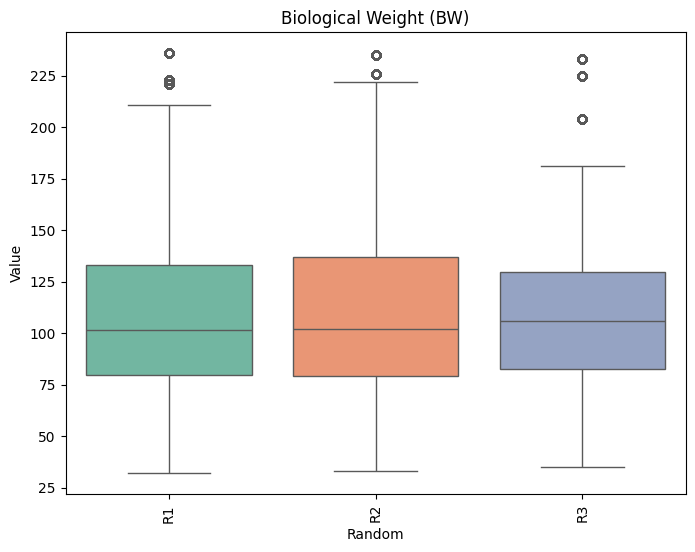

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


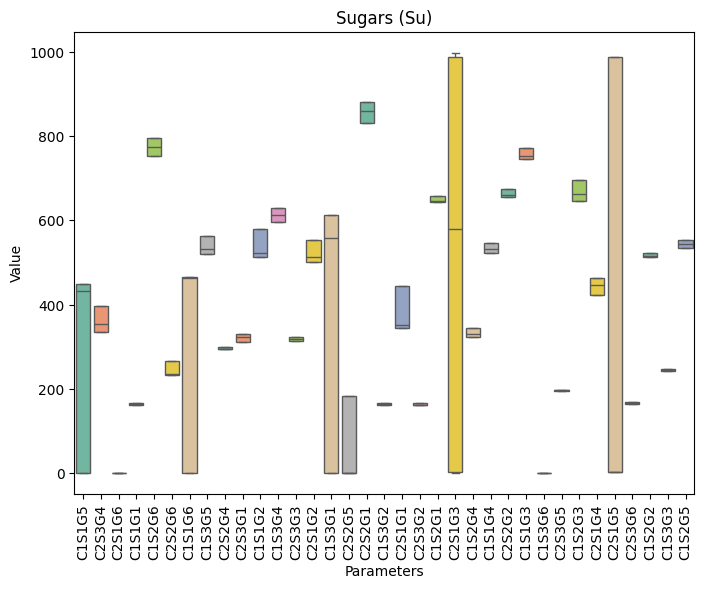

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


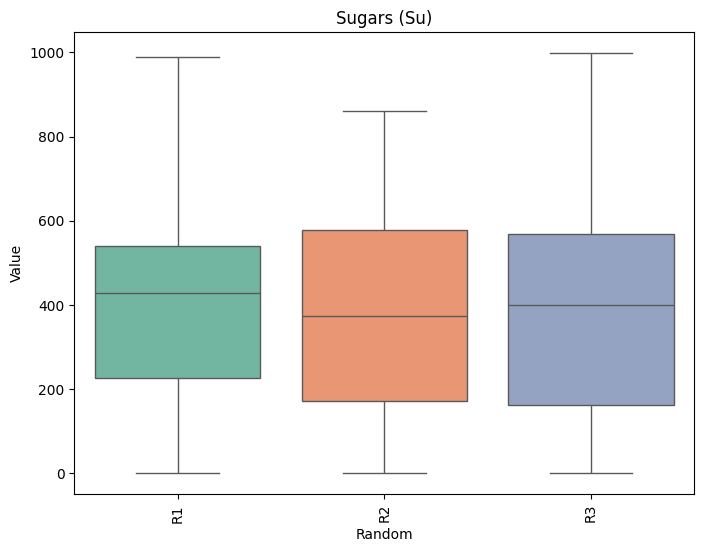

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


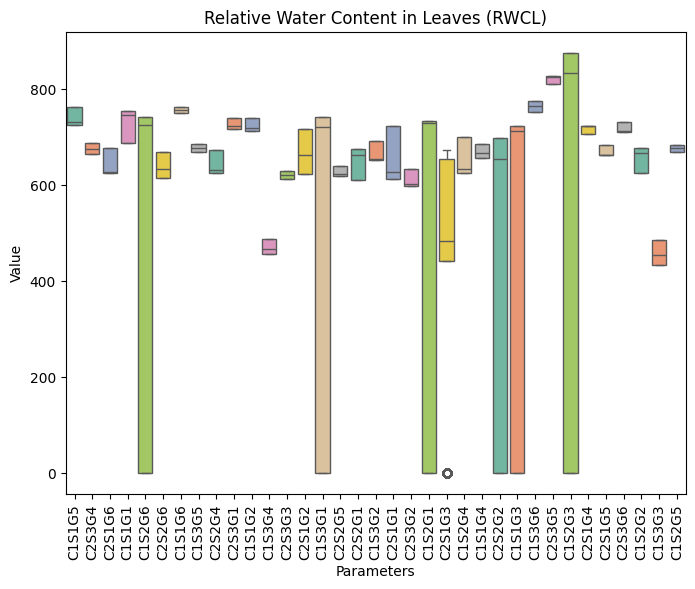

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


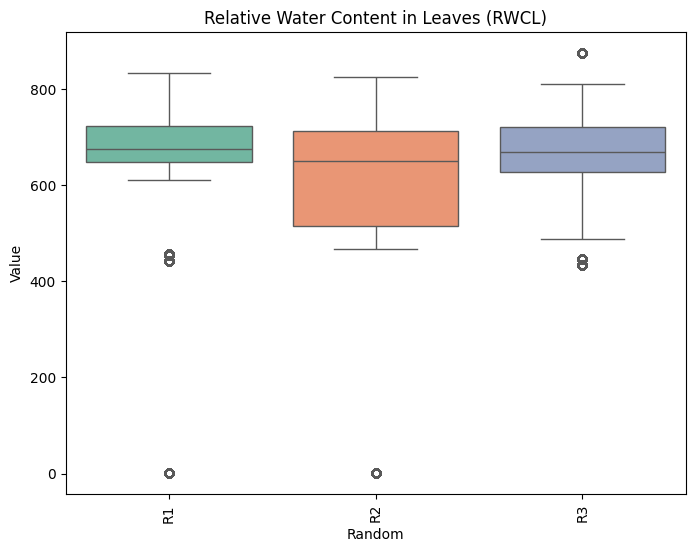

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


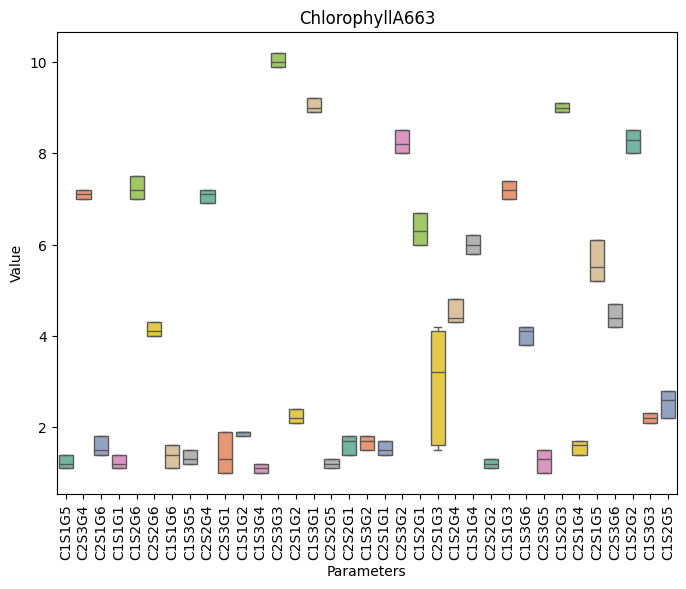

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


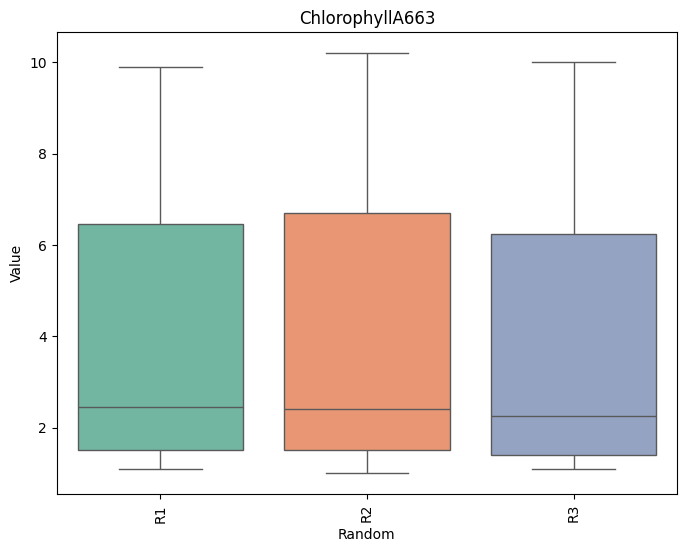

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


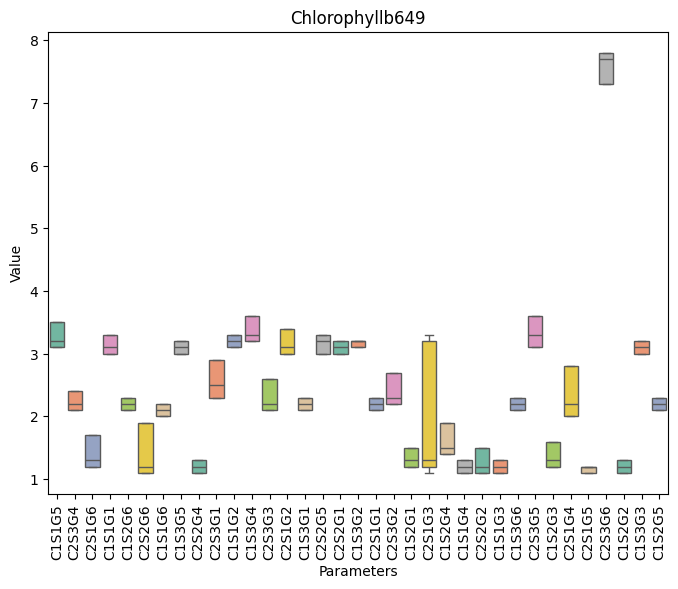

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


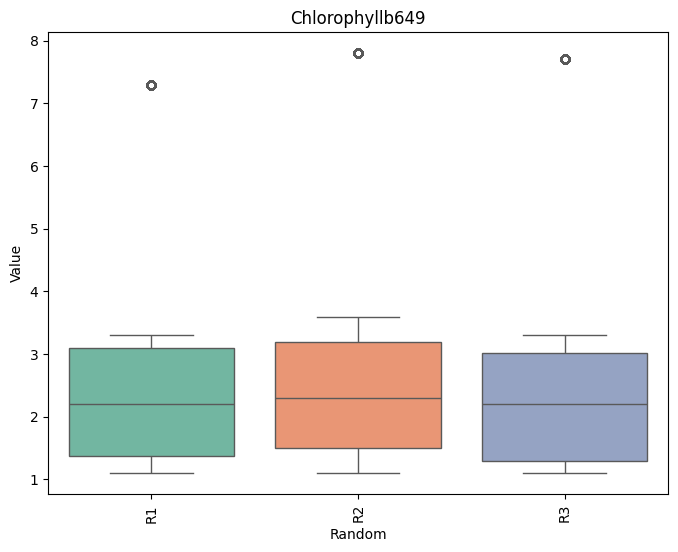

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


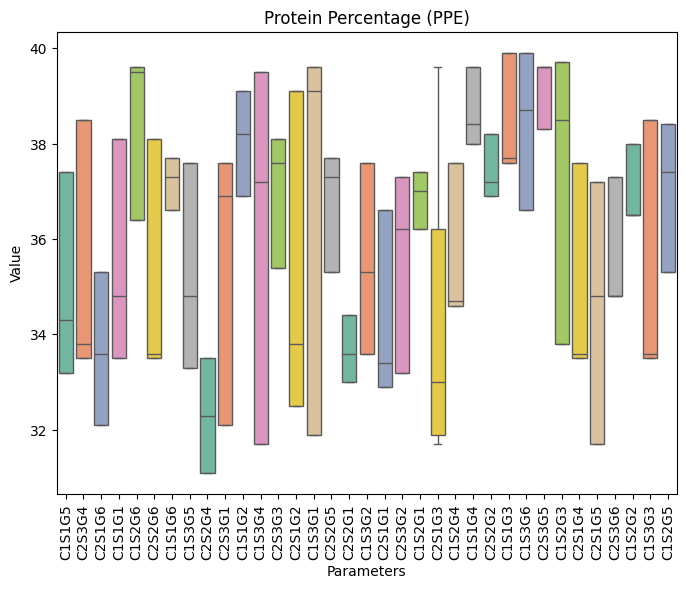

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


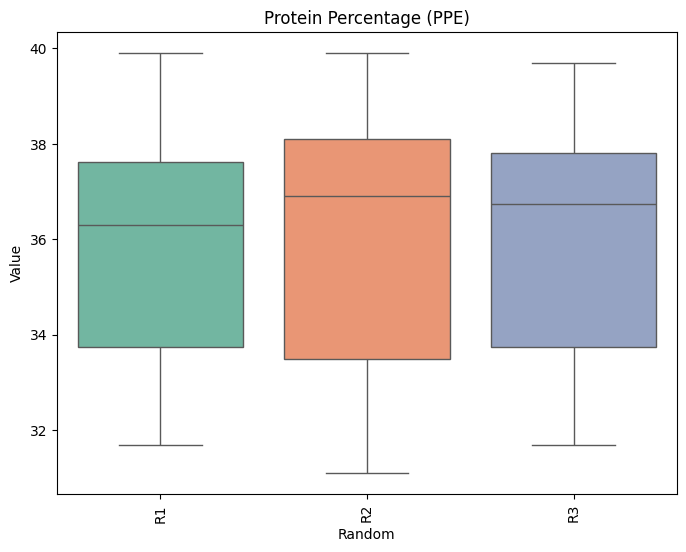

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


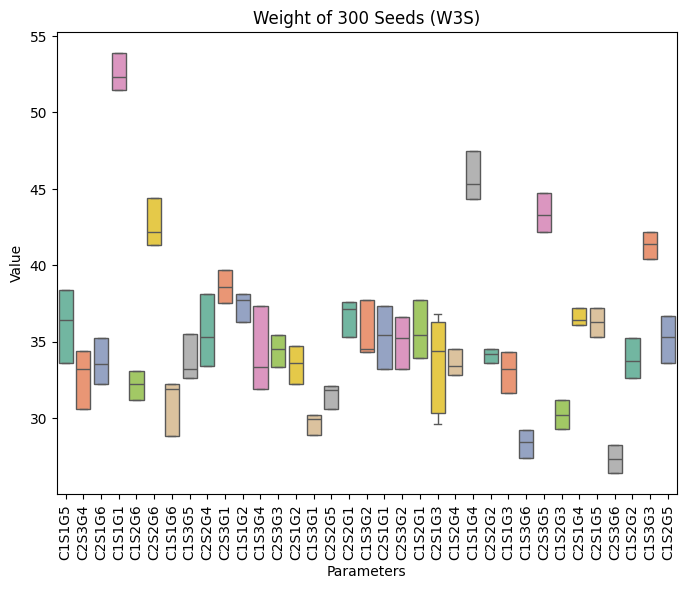

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


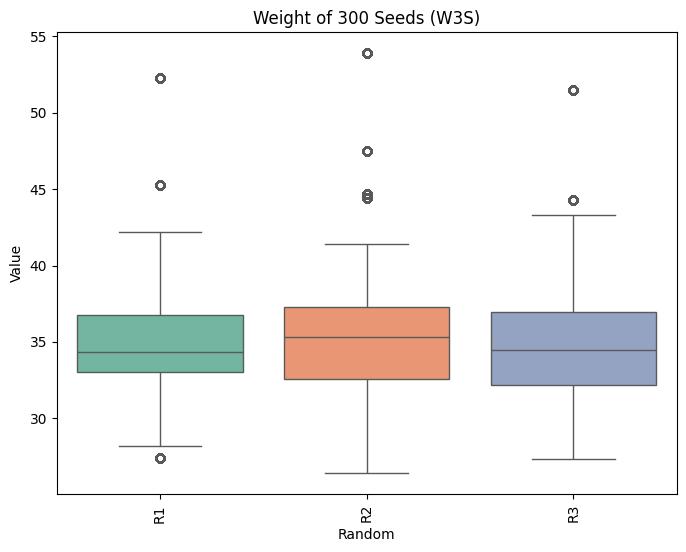

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


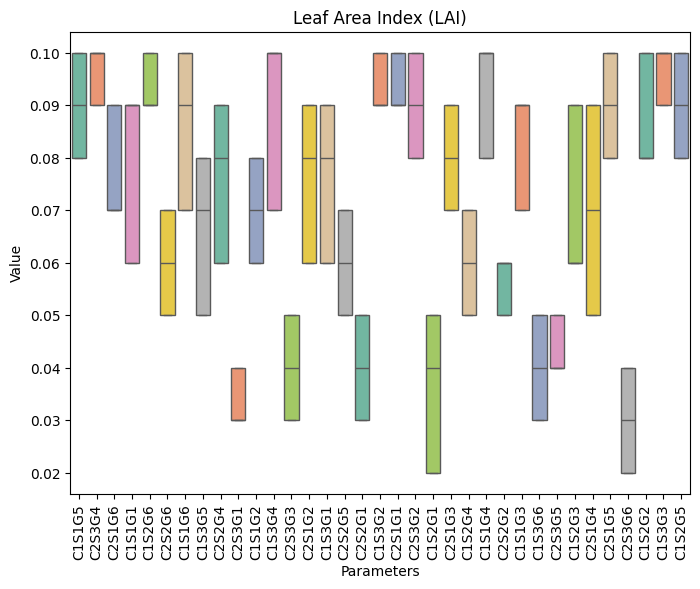

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


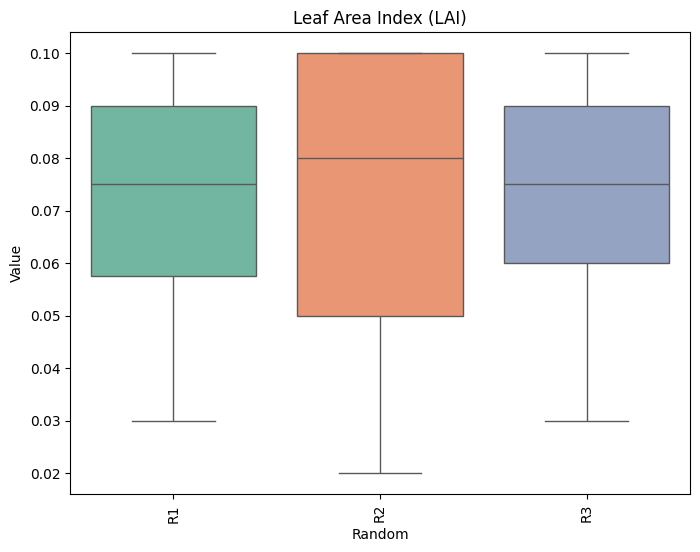

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


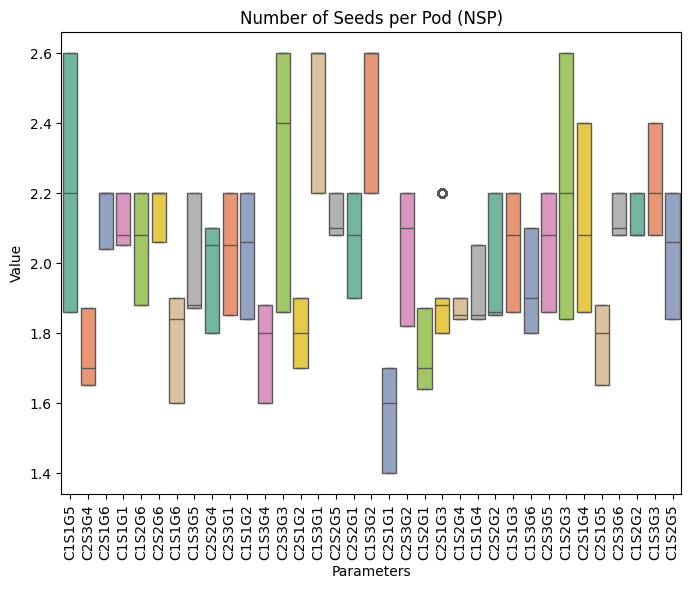

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


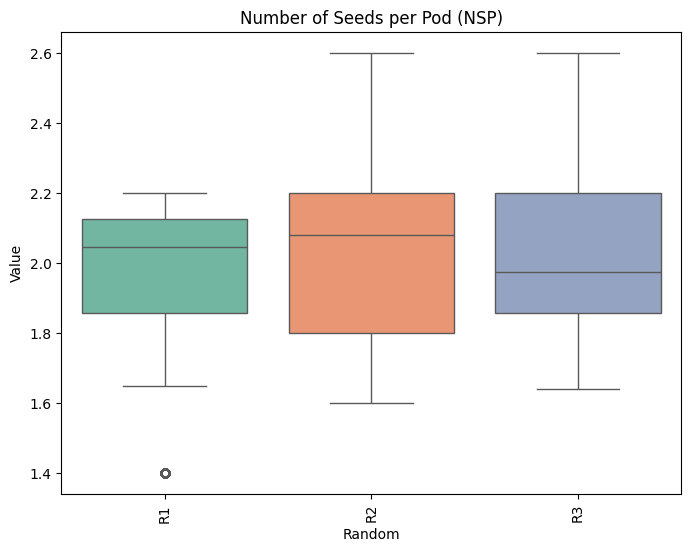

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


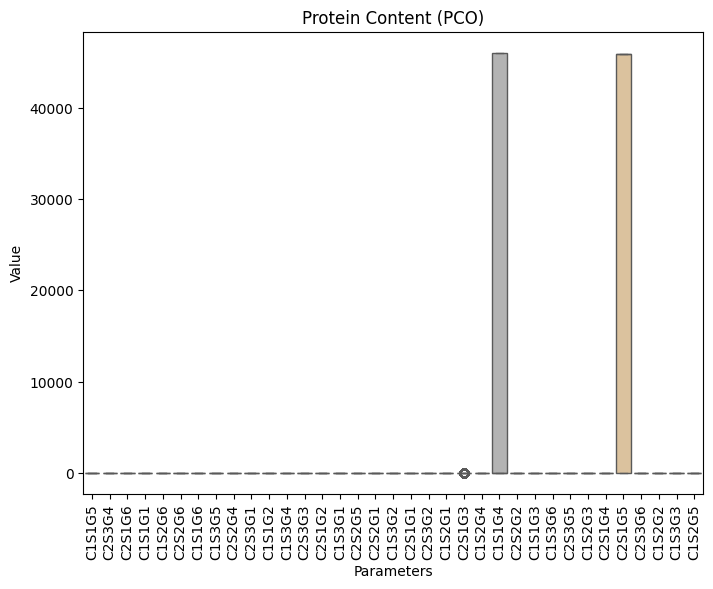

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


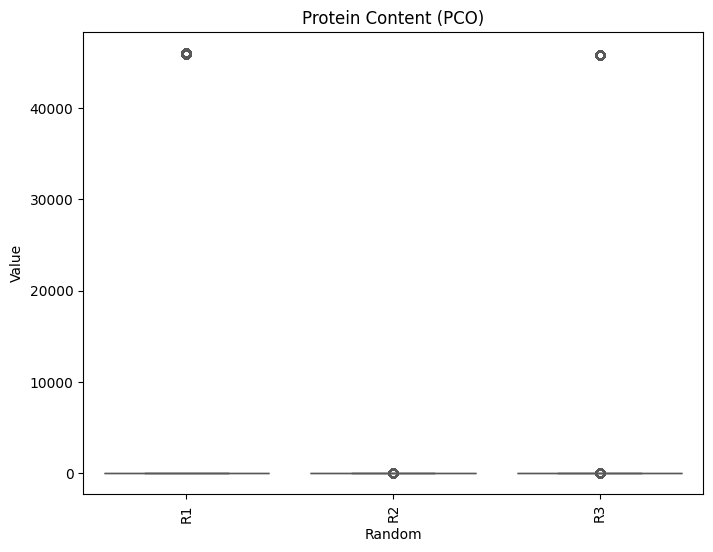

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


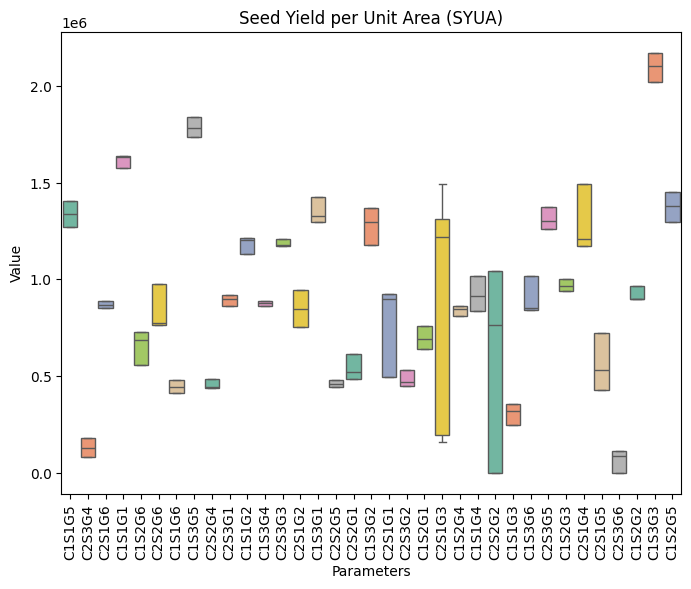

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


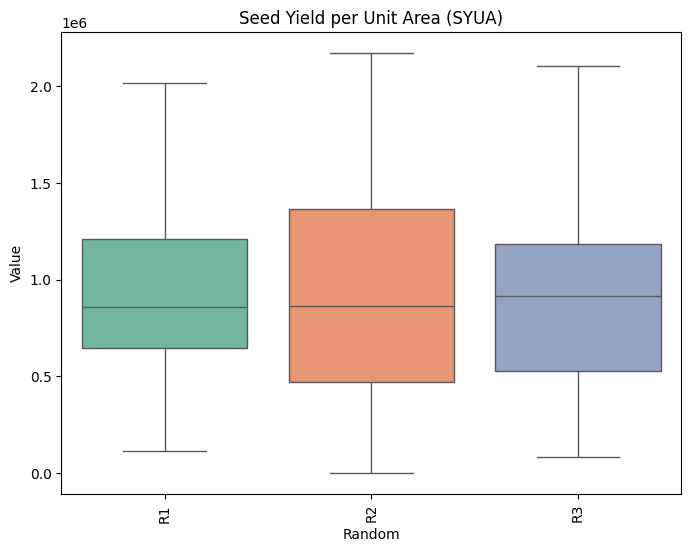

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


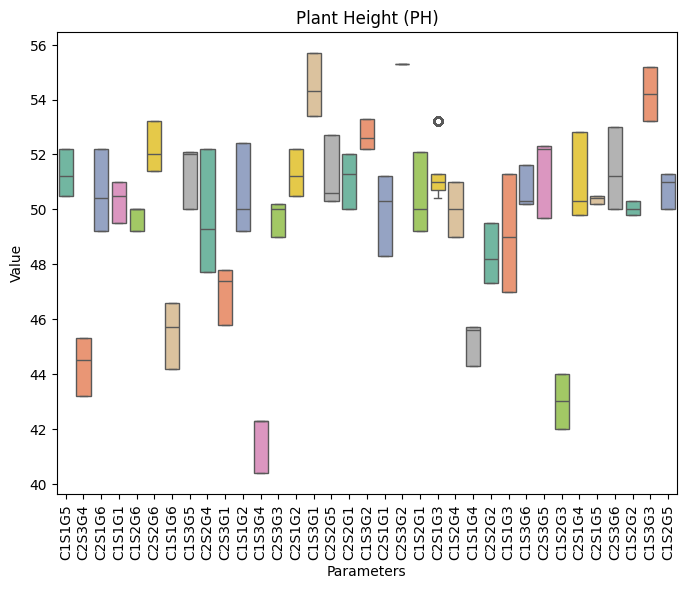

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


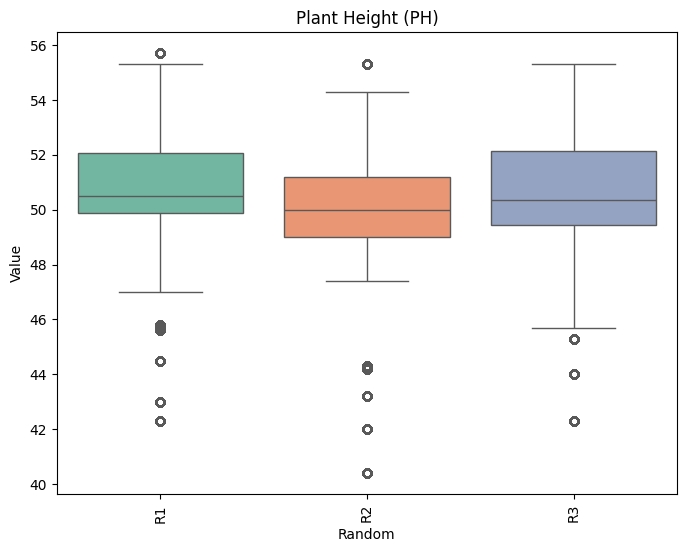

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


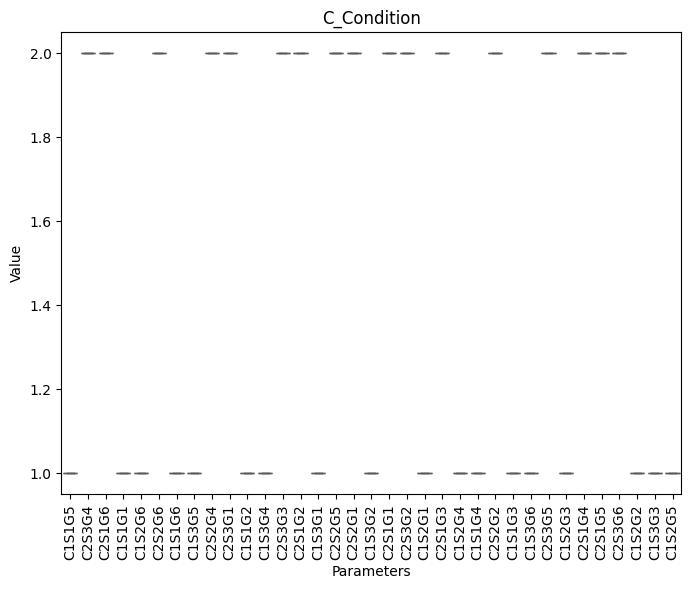

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


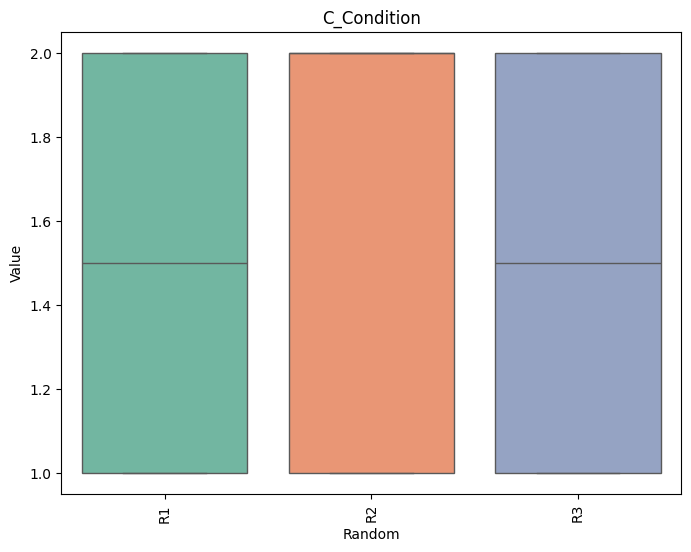

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


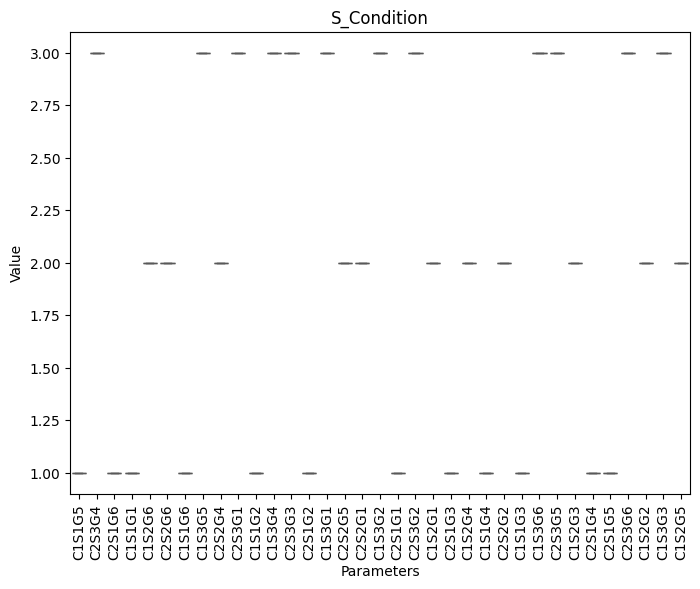

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


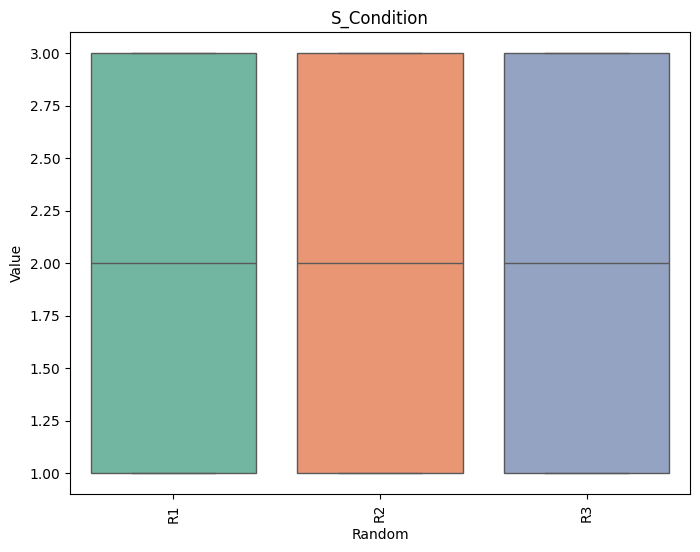

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


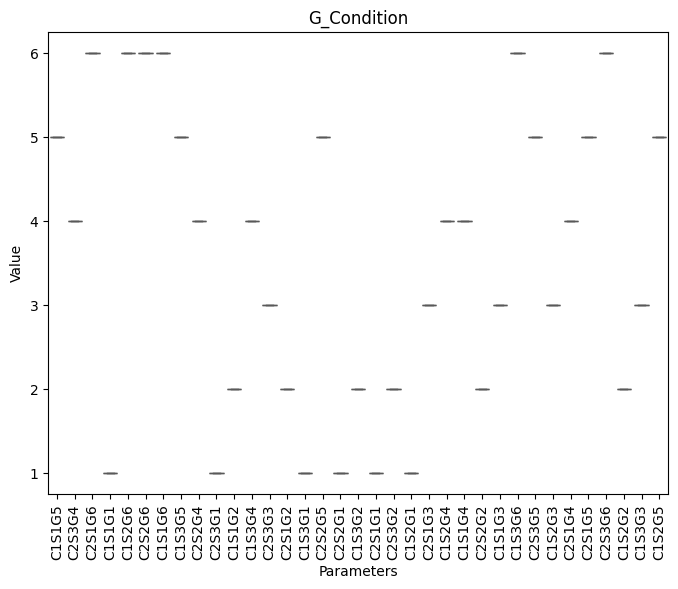

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


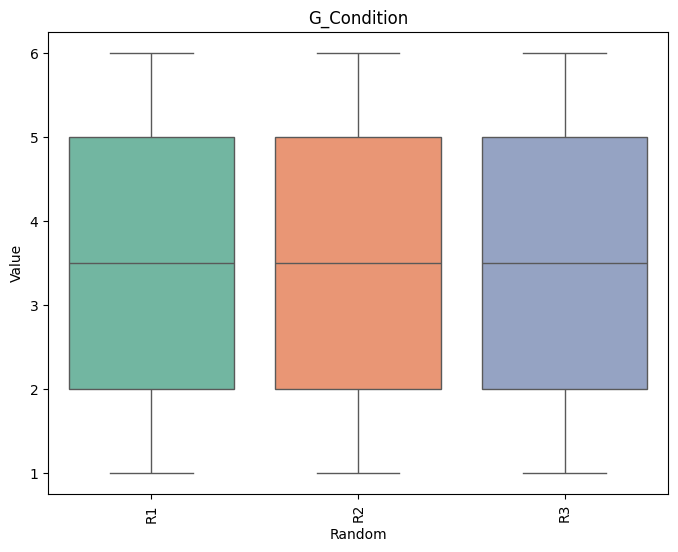

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


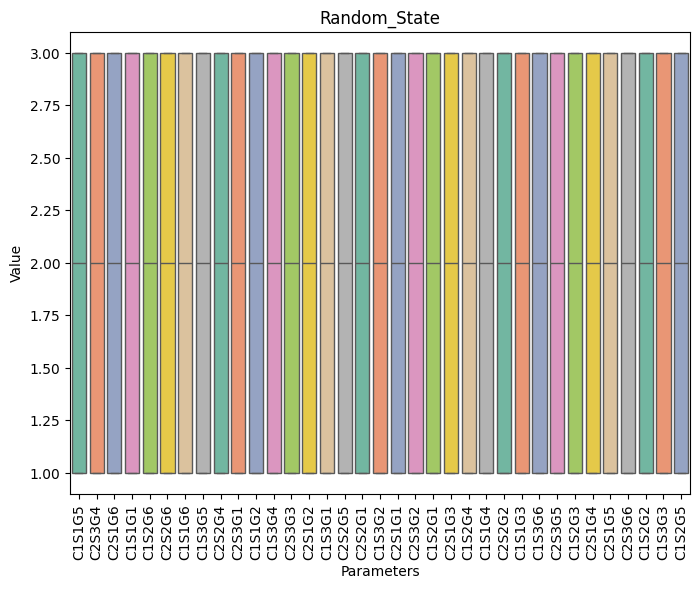

C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\2134186827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y=column, data=df, palette="Set2")


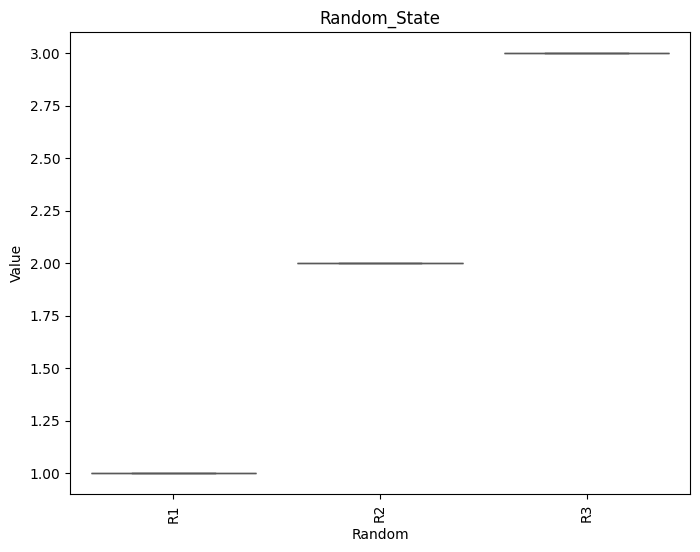

In [19]:
for column in numeric_cols:
    for category in object_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=category, y=column, data=df, palette="Set2")
    
    
        plt.title(column)
        plt.ylabel('Value')
        plt.xticks(rotation=90)
    
        plt.show()

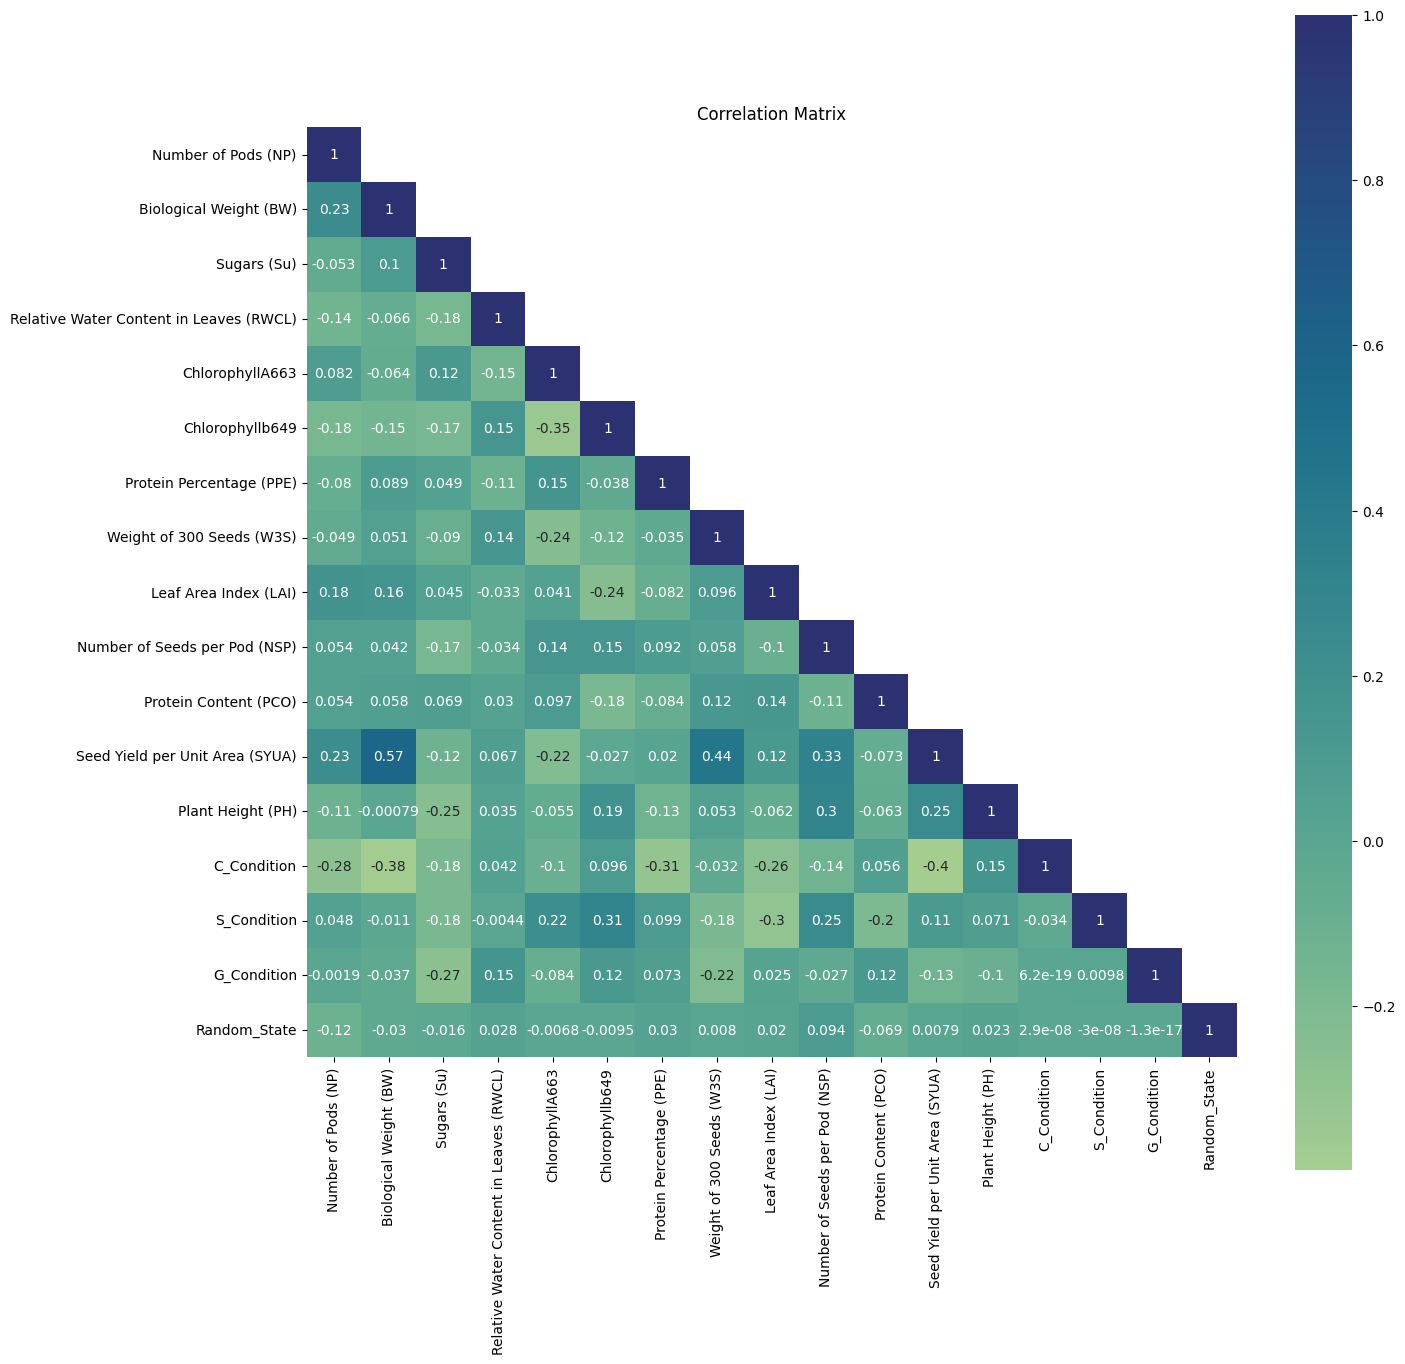

In [20]:
mask = np.triu(np.ones_like(df_v2.corr(), dtype=bool), k=1)

plt.figure(figsize=(15,15))
sns.heatmap(df_v2.corr(), annot=True,mask=mask,  square=True, cmap='crest')
plt.title("Correlation Matrix")
plt.show()

In [21]:
# ['Number of Pods (NP)',
#  'Biological Weight (BW)',
#  'Sugars (Su)',
#  'Relative Water Content in Leaves (RWCL)',
#  'ChlorophyllA663',
#  'Chlorophyllb649',
#  'Protein Percentage (PPE)',
#  'Weight of 300 Seeds (W3S)',
#  'Leaf Area Index (LAI)',
#  'Number of Seeds per Pod (NSP)',
#  'Protein Content (PCO)',
#  'Seed Yield per Unit Area (SYUA)',
#  'Plant Height (PH)',
#  'C_Condition',
#  'S_Condition',
#  'G_Condition',
#  'Random_State']


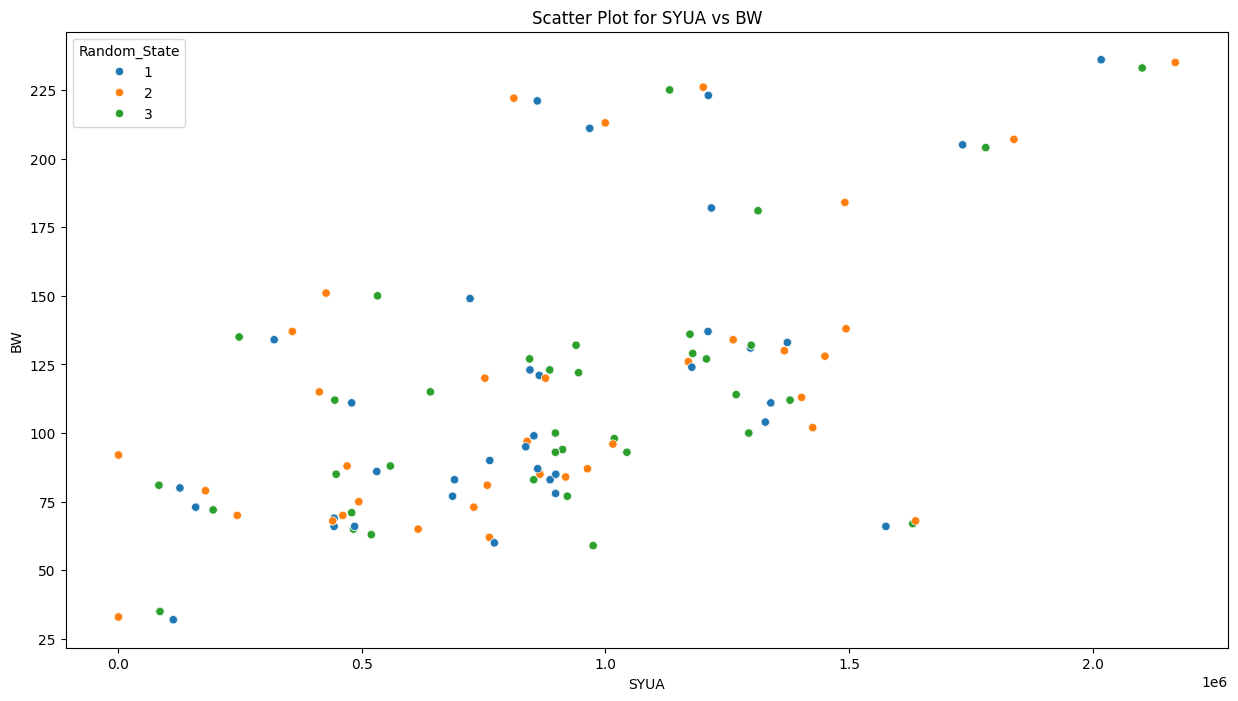

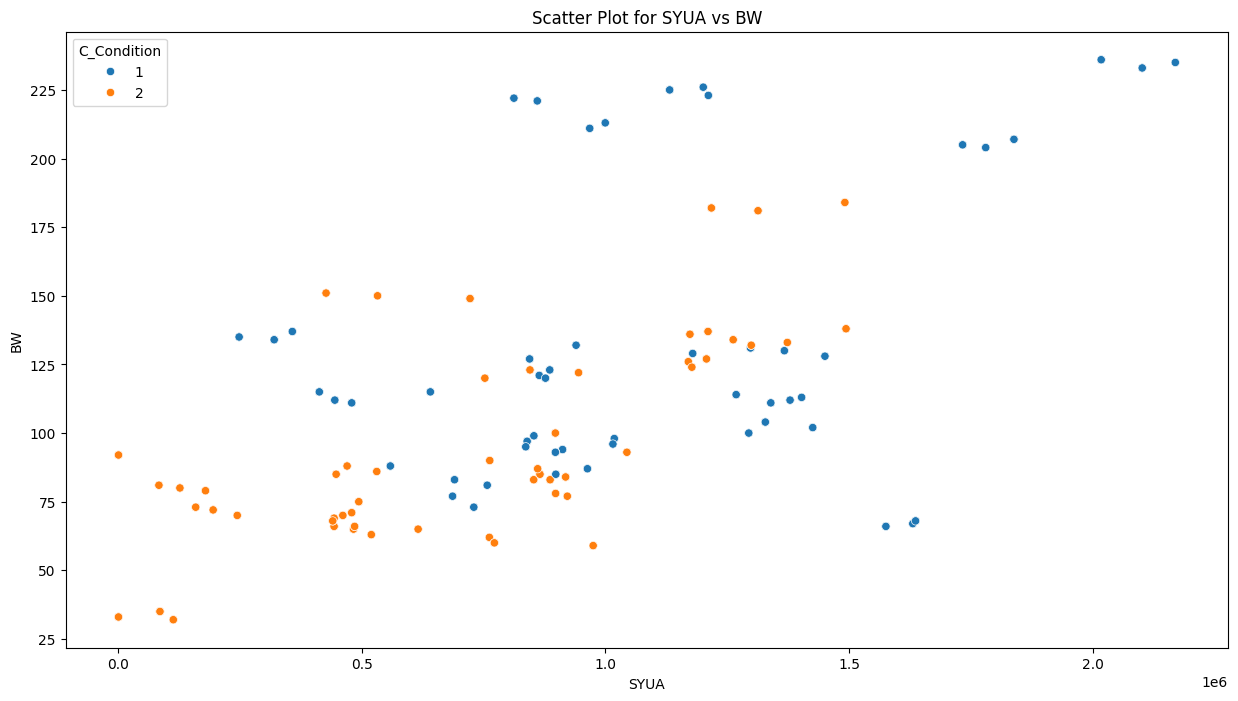

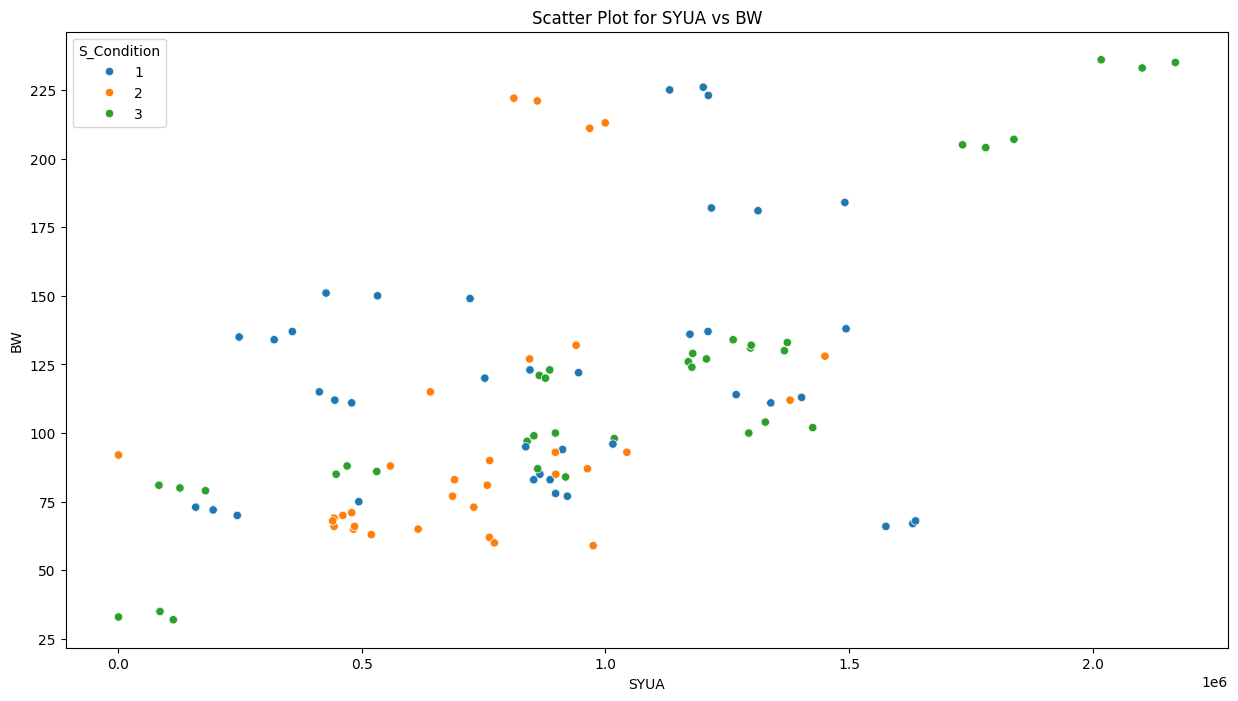

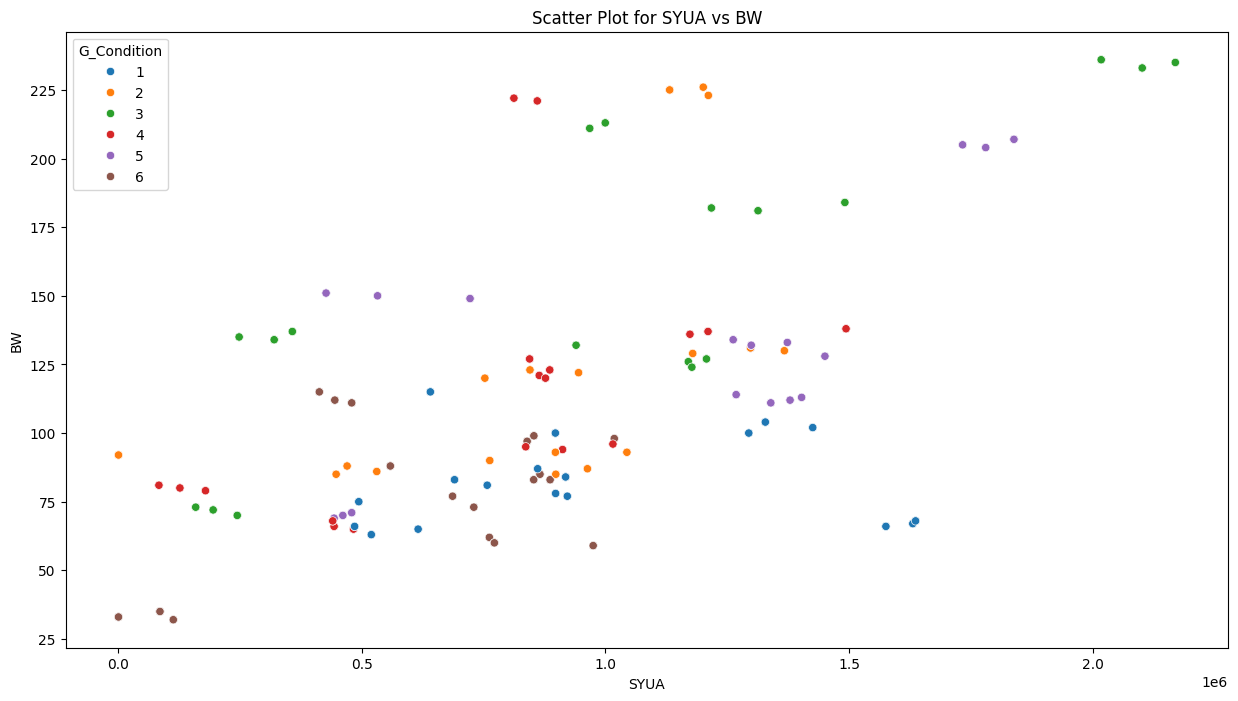

In [22]:
categories = ["Random_State","C_Condition","S_Condition","G_Condition",]
for category in categories:
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df_v2, x='Seed Yield per Unit Area (SYUA)', y='Biological Weight (BW)', hue=category, palette="tab10")
    plt.title("Scatter Plot for SYUA vs BW")
    plt.xlabel("SYUA")
    plt.ylabel("BW")
    plt.show()

<Figure size 1500x1500 with 0 Axes>

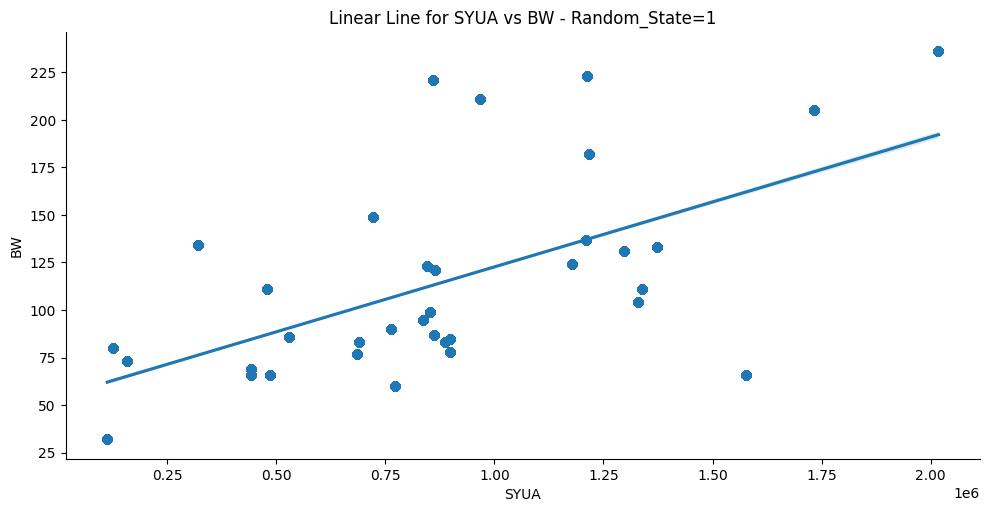

<Figure size 1500x1500 with 0 Axes>

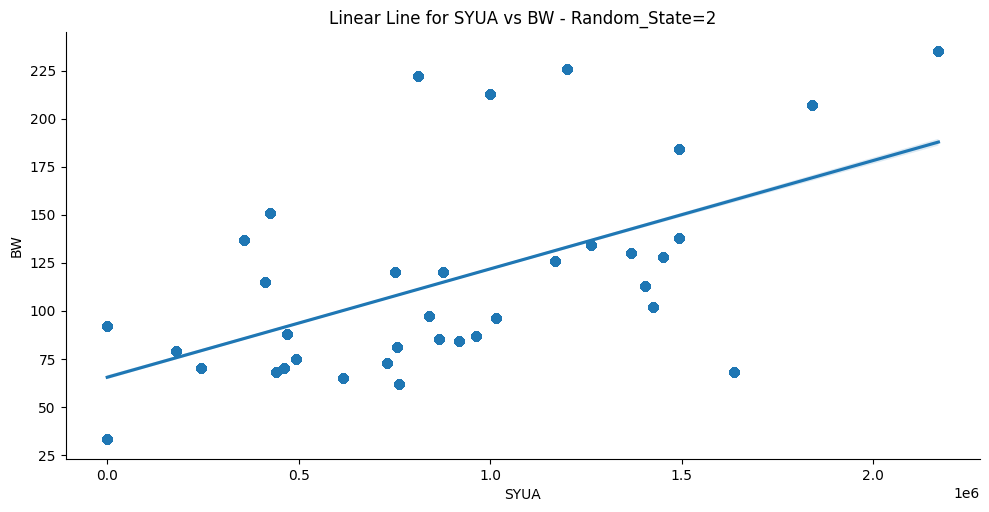

<Figure size 1500x1500 with 0 Axes>

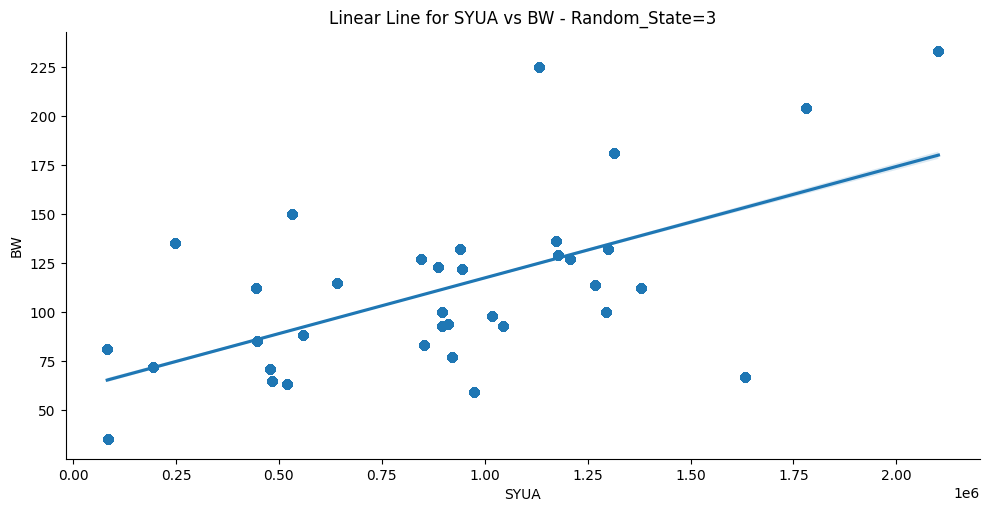

<Figure size 1500x1500 with 0 Axes>

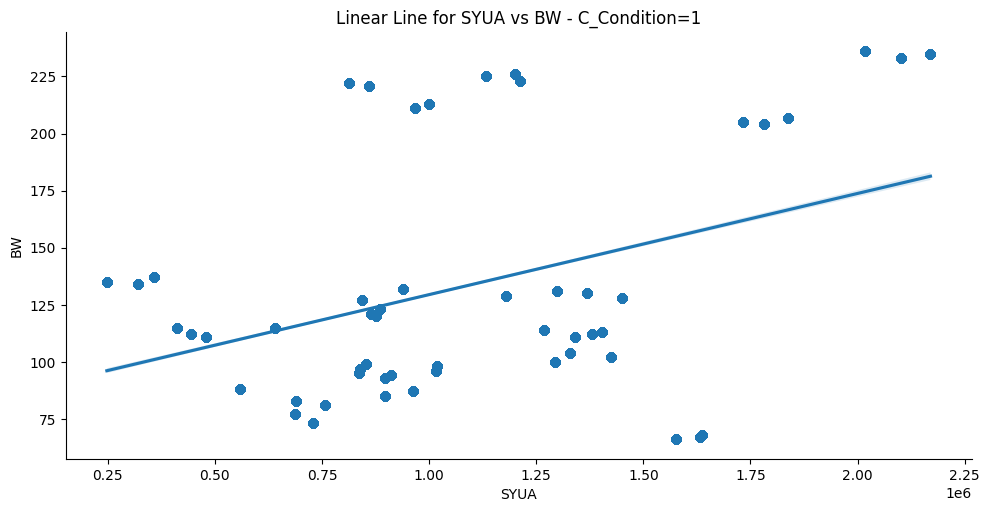

<Figure size 1500x1500 with 0 Axes>

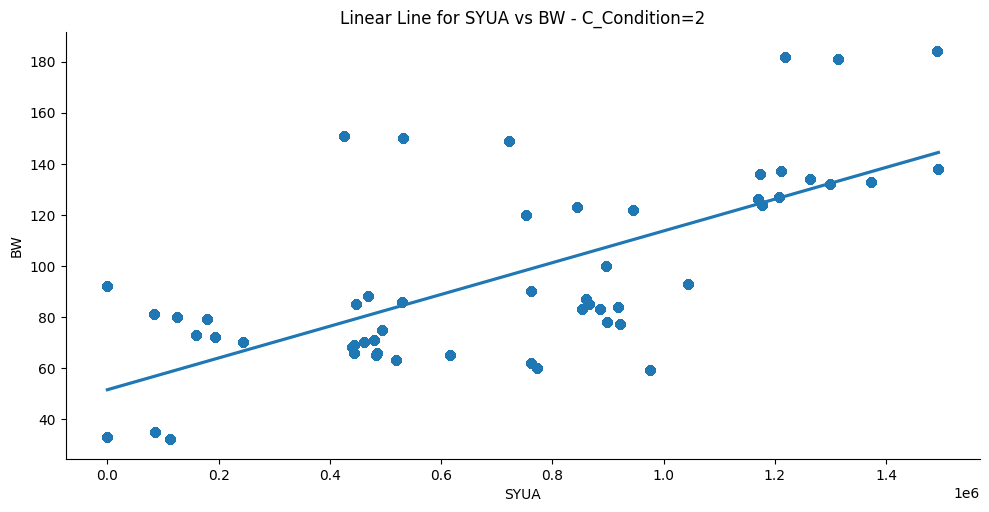

<Figure size 1500x1500 with 0 Axes>

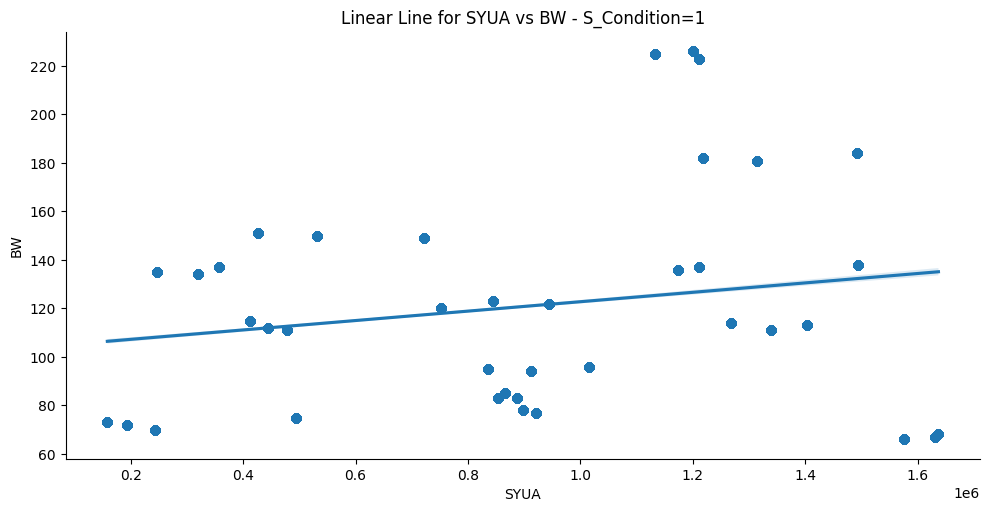

<Figure size 1500x1500 with 0 Axes>

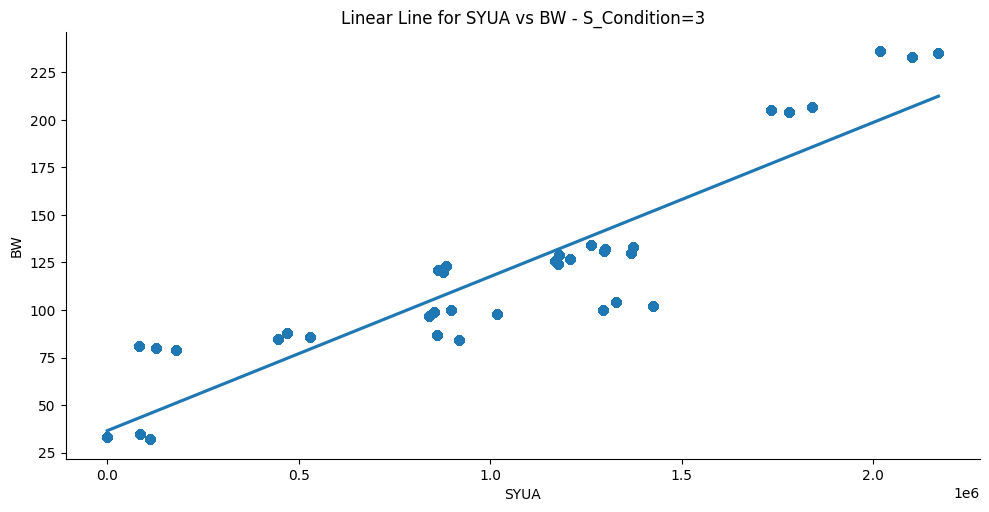

<Figure size 1500x1500 with 0 Axes>

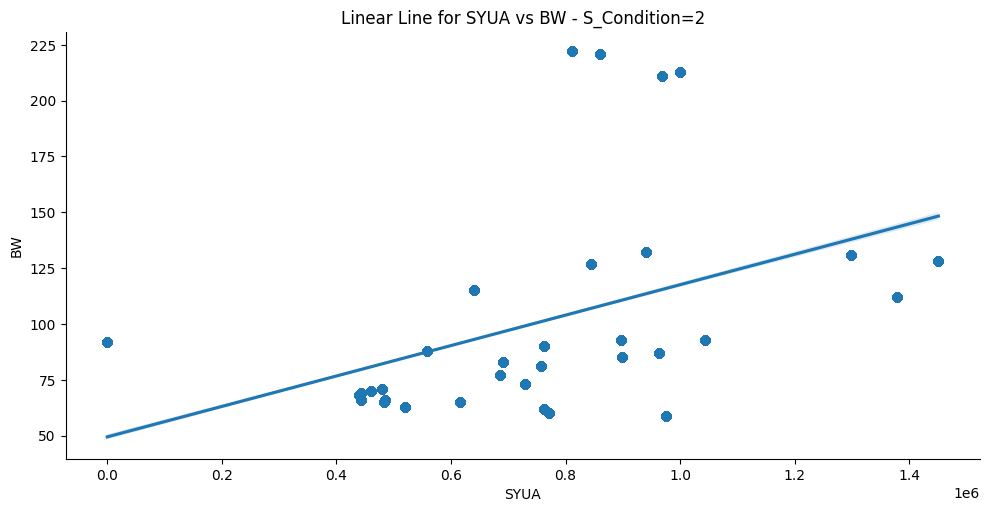

<Figure size 1500x1500 with 0 Axes>

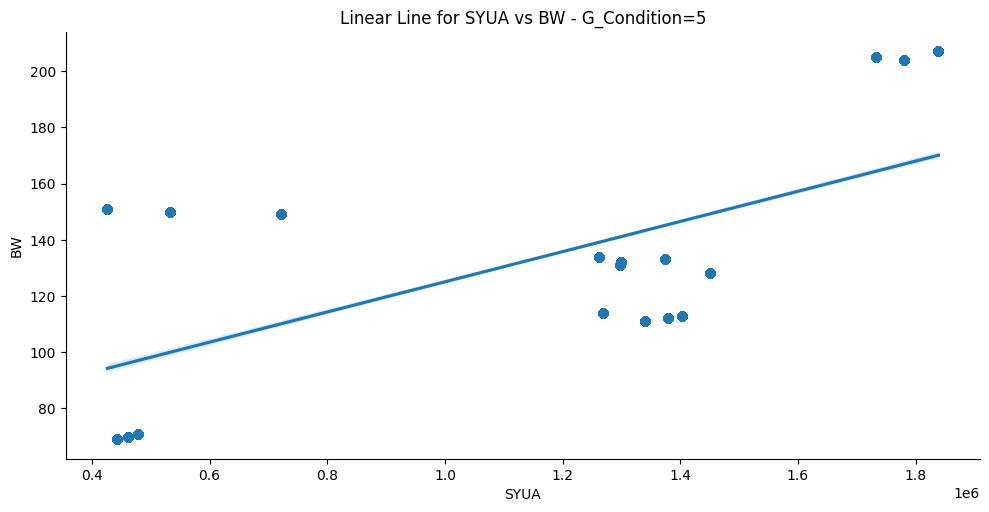

<Figure size 1500x1500 with 0 Axes>

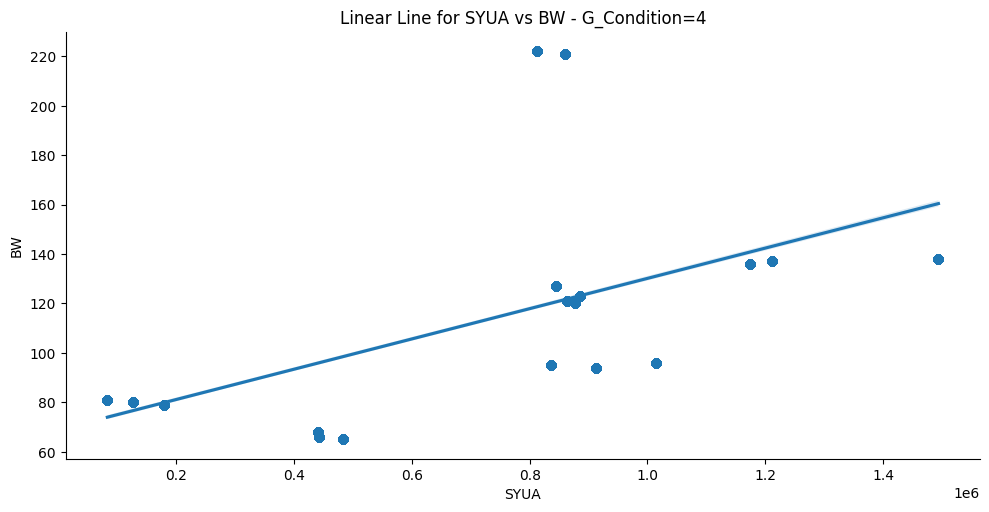

<Figure size 1500x1500 with 0 Axes>

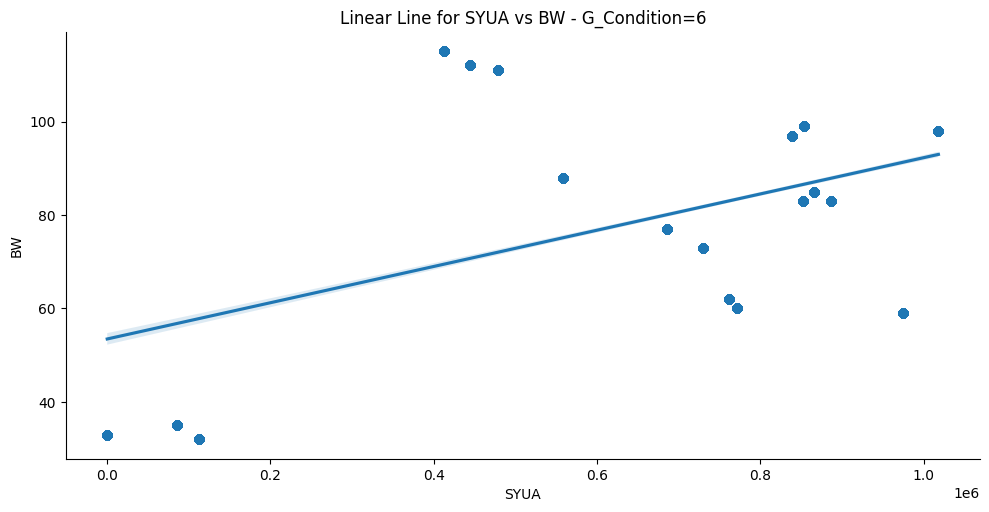

<Figure size 1500x1500 with 0 Axes>

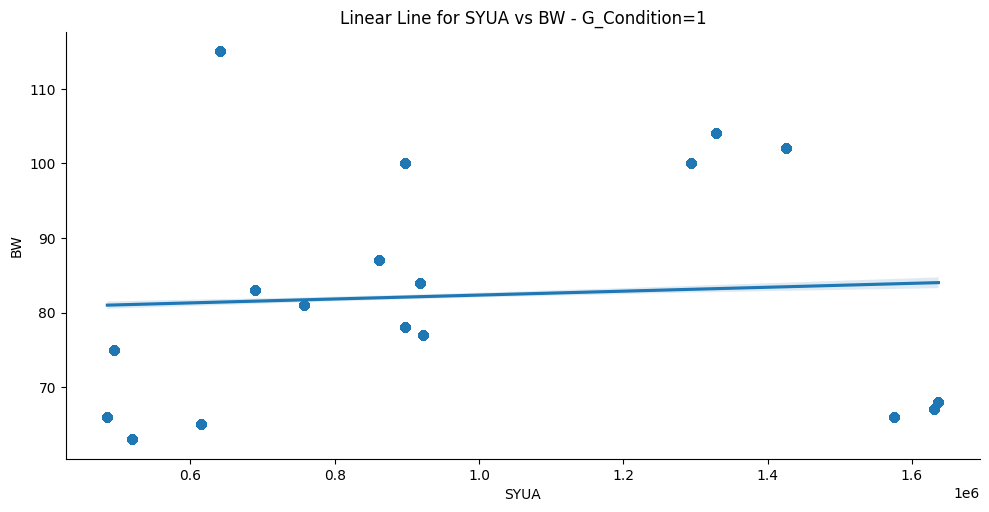

<Figure size 1500x1500 with 0 Axes>

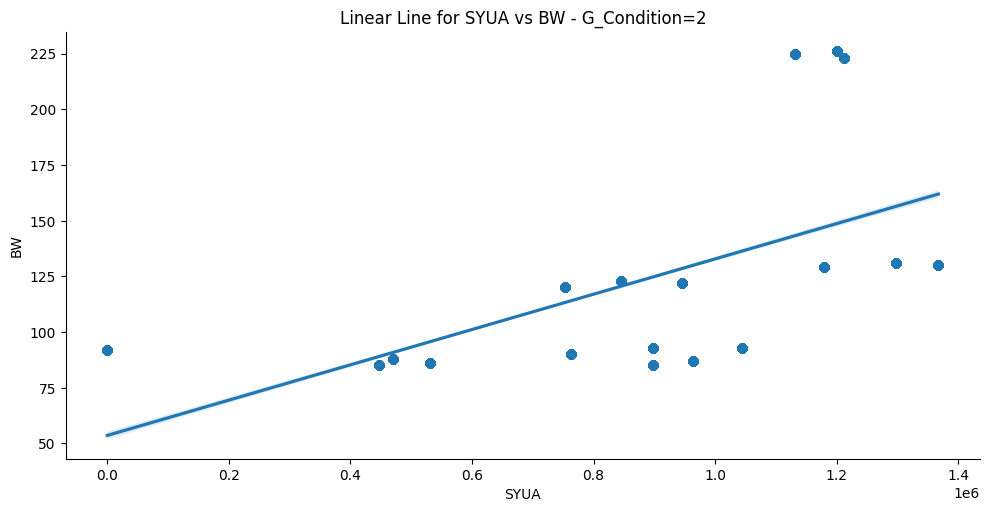

<Figure size 1500x1500 with 0 Axes>

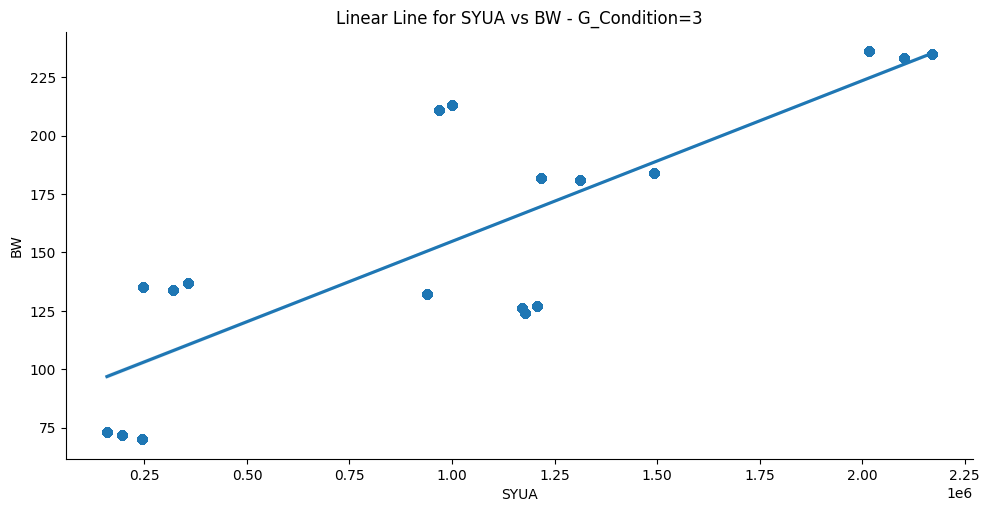

In [23]:
categories = ["Random_State","C_Condition","S_Condition","G_Condition",]

for category in categories:
    for value in df_v2[category].unique():
        plt.figure(figsize=(15,15))
        sns.lmplot(data=df_v2[df_v2[category] == value], x='Seed Yield per Unit Area (SYUA)', y='Biological Weight (BW)',height=5,aspect=2)
        plt.title(f"Linear Line for SYUA vs BW - {category}={value}")
        plt.xlabel("SYUA")
        plt.ylabel("BW")
        plt.show()

## Feature Selection

- Correlation Analysis and Scatter plot indicate a linea relationship between SYUA and BW

### Feature Selection using RFE

In [24]:
X = df_v2.drop(columns=['Seed Yield per Unit Area (SYUA)'])  
y = df_v2['Seed Yield per Unit Area (SYUA)'] 

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:\n", *selected_features, sep="\n")

Selected Features:

ChlorophyllA663
Chlorophyllb649
Protein Percentage (PPE)
Weight of 300 Seeds (W3S)
Leaf Area Index (LAI)
Number of Seeds per Pod (NSP)
Plant Height (PH)
C_Condition
S_Condition
G_Condition


### Statistical Significane

In [25]:
X = sm.add_constant(X)  
y = df_v2['Seed Yield per Unit Area (SYUA)'] 

model = sm.OLS(y, X).fit()
print(model.summary())  # Look at p-values


                                   OLS Regression Results                                  
Dep. Variable:     Seed Yield per Unit Area (SYUA)   R-squared:                       0.709
Model:                                         OLS   Adj. R-squared:                  0.709
Method:                              Least Squares   F-statistic:                     8430.
Date:                             Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                                     20:19:06   Log-Likelihood:            -7.6850e+05
No. Observations:                            55450   AIC:                         1.537e+06
Df Residuals:                                55433   BIC:                         1.537e+06
Df Model:                                       16                                         
Covariance Type:                         nonrobust                                         
                                              coef    std err          t      P>

### Feature Selection using Lasso

In [26]:
lasso = LassoCV(cv=5).fit(X, y)
features = X.columns[lasso.coef_ != 0]
print("Selected Features:\n", *features, sep="\n")

Selected Features:

Number of Pods (NP)
Biological Weight (BW)
Sugars (Su)
Relative Water Content in Leaves (RWCL)
Weight of 300 Seeds (W3S)
Protein Content (PCO)
Plant Height (PH)


### Non-Linear Feature Checks

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


Biological Weight (BW)                     0.435801
Weight of 300 Seeds (W3S)                  0.140425
Number of Pods (NP)                        0.105561
Sugars (Su)                                0.104064
Number of Seeds per Pod (NSP)              0.078404
Plant Height (PH)                          0.051015
G_Condition                                0.041430
Chlorophyllb649                            0.016333
Leaf Area Index (LAI)                      0.007333
Protein Percentage (PPE)                   0.006192
Relative Water Content in Leaves (RWCL)    0.003588
C_Condition                                0.003459
ChlorophyllA663                            0.002469
Protein Content (PCO)                      0.002226
Random_State                               0.001020
S_Condition                                0.000679
const                                      0.000000
dtype: float64


Even though the correlation analysis indicated BW having a correlation with SYUA, the following features showed significance across the feature selection methods used:

- Weight of 300 Seeds (W3S) (RFE, LassoCV, Random Forest)
- Plant Height (PH) (RFE, LassoCV, Random Forest)
- Biological Weight (BW)  (LassoCV, Random Forest, high importance score)
- Number of Pods (NP)  (LassoCV, Random Forest, high importance score)
- Sugars (Su)  (LassoCV, Random Forest, high importance score)
- Number of Seeds per Pod (NSP)  (RFE, Random Forest, moderate importance score)
- G_Condition  (RFE, Random Forest, moderate importance score)

# Data Prep for Predicitive Modeling


In [28]:
df_v3 = df_v2[["Weight of 300 Seeds (W3S)","Plant Height (PH)","Biological Weight (BW)",
               "Number of Pods (NP)","Sugars (Su)","Number of Seeds per Pod (NSP)","G_Condition","Seed Yield per Unit Area (SYUA)"]]

In [29]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Weight of 300 Seeds (W3S)        55450 non-null  float64
 1   Plant Height (PH)                55450 non-null  float64
 2   Biological Weight (BW)           55450 non-null  float64
 3   Number of Pods (NP)              55450 non-null  float64
 4   Sugars (Su)                      55450 non-null  float64
 5   Number of Seeds per Pod (NSP)    55450 non-null  float64
 6   G_Condition                      55450 non-null  int64  
 7   Seed Yield per Unit Area (SYUA)  55450 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.4 MB


In [30]:
df_v3.isna().sum()

Weight of 300 Seeds (W3S)          0
Plant Height (PH)                  0
Biological Weight (BW)             0
Number of Pods (NP)                0
Sugars (Su)                        0
Number of Seeds per Pod (NSP)      0
G_Condition                        0
Seed Yield per Unit Area (SYUA)    0
dtype: int64

In [31]:
df_v3.head()

,Weight of 300 Seeds (W3S),Plant Height (PH),Biological Weight (BW),Number of Pods (NP),Sugars (Su),Number of Seeds per Pod (NSP),G_Condition,Seed Yield per Unit Area (SYUA)
0,33.6,50.5,111.0,130.3,433.00,1.86,5,1339436.0
1,34.4,44.5,80.0,132.0,334.00,1.87,4,126131.0
2,35.2,52.2,83.0,150.0,0.49,2.04,6,886261.0
3,52.3,50.5,66.0,140.8,163.00,2.20,1,1575778.0
4,31.2,49.2,73.0,175.6,795.00,1.88,6,729604.0


In [32]:
y = df_v3[["Seed Yield per Unit Area (SYUA)"]]
X = df_v3.drop("Seed Yield per Unit Area (SYUA)",axis=1)

In [35]:
def optimum_cluster(features):
    """Utility function to compute the optimum number of clusters using the elbow method."""
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    # Calculate the "elbow" point using the second derivative
    wcss_diff = np.diff(wcss)  # First derivative
    wcss_diff2 = np.diff(wcss_diff)  # Second derivative

    # Find the index where the second derivative changes the most (highest positive value)
    elbow_index = np.argmax(wcss_diff2) + 2  # +2 accounts for diff shifts
    return elbow_index

In [38]:
n_clusters = optimum_cluster(X)
print(f"The Optimum Clusters using the elbow method is {n_clusters}")

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_v3["Cluster"] = kmeans.fit_predict(X)


The Optimum Clusters using the elbow method is 2


C:\Users\Bob\AppData\Local\Temp\ipykernel_5008\844226780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3["Cluster"] = kmeans.fit_predict(X)


In [39]:
df_v3.Cluster.value_counts()

Cluster
1    28239
0    27211
Name: count, dtype: int64